Q1)
Consider the hepatitis/ pima-indians-diabetes csv file, perform the following date pre-processing.
1. Load data in Pandas.
2. Drop columns that aren’t useful.
3. Drop rows with missing values.
4. Create dummy variables.
5. Take care of missing data.
6. Convert the data frame to NumPy.
7. Divide the data set into training data and test data.

In [2]:
import pandas as pd
df = pd.read_csv('/home/AIML_Student/Documents/B34_aiml/Lab3/diabetes_csv.csv')
print(df)
#dropping columns Pregnancies, SkinThickness and BloodPressure
df = df.drop('BloodPressure', axis = 1)
df = df.drop('SkinThickness',axis =1)
df = df.drop('Pregnancies',axis =1)
count = 0

#dropping rows with missing values
#print(df==0) #True or False
df = df[df!=0] #converting all 0's to Nan
df = df.dropna(subset=df.columns.difference(['Outcome'])) #dropping NaN values except column Outcome
df = df.fillna(0) #filling NaN values in Outcome with 0
print(df) #df with no null values

#creating dummy variables
dummies = pd.get_dummies(df['Outcome'])
print(dummies)

#take care of missing data
#no missing data left in df

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [56]:
#taking only DiabetesPedigreeFunction and Outcome
df1 = pd.DataFrame(df, columns = ['Insulin','Age'])

#Convert the df to numpy
import numpy as np
ar = df1.to_numpy(dtype = float)

#Divide the data set into training data and test data.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# get the locations
X = df1.iloc[:, :-1]
Y = df1.iloc[:, -1]

# split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=0)
"""print(X_train)
print(Y_train)
print(X_test)
print(Y_test)"""

     Insulin
3       94.0
4      168.0
6       88.0
8      543.0
13     846.0
..       ...
753    510.0
755    110.0
760     16.0
763    180.0
765    112.0

[392 rows x 1 columns]
3      21
4      33
6      26
8      53
13     59
       ..
753    26
755    37
760    22
763    63
765    30
Name: Age, Length: 392, dtype: int64


'print(X_train)\nprint(Y_train)\nprint(X_test)\nprint(Y_test)'

In [57]:
from sklearn.metrics import mean_squared_error
import math

In [58]:
model = LinearRegression(fit_intercept = True)
model.fit(X,Y)

LinearRegression()

In [59]:
r_sq = model.score(X,Y)
b0 = model.intercept_
b1 = model.coef_
print(f"coefficient of determination: {r_sq}")
print(f"intercept: b0: {model.intercept_}")
print(f"slope: b1: {model.coef_}")

Y_pred = b0 + b1 * X

mse = mean_squared_error(Y, Y_pred)
rmse = math.sqrt(mse)
print("rmse: ",rmse)


coefficient of determination: 0.04712459077515563
intercept: b0: 27.95696584955654
slope: b1: [0.01863323]
rmse:  9.944813397637569


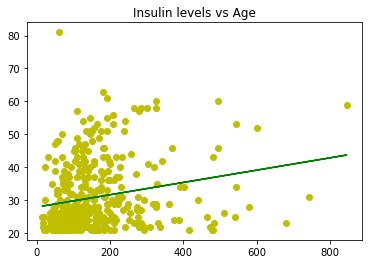

In [63]:
import matplotlib.pyplot as plt
plt.scatter(X,Y,color = 'y', marker = 'o')
plt.plot(X,Y_pred, color = 'g')
plt.title('Insulin levels vs Age')
plt.show()